In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree, DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv('./datasets/heart_dataset.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalachh,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1883,60,1,0,140,207,0,0,138,1,1.9,2,1,3,0
1884,46,1,0,140,311,0,1,120,1,1.8,1,2,3,0
1885,59,1,3,134,204,0,1,162,0,0.8,2,2,2,0
1886,54,1,1,154,232,0,0,164,0,0.0,2,1,2,0


In [5]:
X = df.drop('target', axis=1)
y = df['target']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
def build_cart(X_train, y_train):
    model = DecisionTreeClassifier(criterion='gini')
    model.fit(X_train, y_train)
    return model

def build_id3(X_train, y_train):
    model = DecisionTreeClassifier(criterion='entropy')
    model.fit(X_train, y_train)
    return model

def build_c45(X_train, y_train):
    model = DecisionTreeClassifier(criterion='gini', max_depth=5)
    model.fit(X_train, y_train)
    return model

In [11]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test) if hasattr(model, 'predict') else model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    # Confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0  # Avoid division by zero

    return accuracy, recall, precision, sensitivity

In [12]:
cart_model = build_cart(X_train, y_train)
id3_model = build_id3(X_train, y_train)
c45_model = build_c45(X_train, y_train)

In [13]:
cart_metrics = evaluate_model(cart_model, X_test.to_numpy(), y_test.to_numpy())
id3_metrics = evaluate_model(id3_model, X_test, y_test)
c45_metrics = evaluate_model(c45_model, X_test, y_test)

C:\Users\harsh\miniconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [14]:
print("CART Metrics (Accuracy, Recall, Precision, Sensitivity):", cart_metrics)
print("ID3 Metrics (Accuracy, Recall, Precision, Sensitivity):", id3_metrics)
print("C4.5 Metrics (Accuracy, Recall, Precision, Sensitivity):", c45_metrics)

CART Metrics (Accuracy, Recall, Precision, Sensitivity): (0.9444444444444444, 0.9578947368421052, 0.9333333333333333, 0.9578947368421052)
ID3 Metrics (Accuracy, Recall, Precision, Sensitivity): (0.9285714285714286, 0.9368421052631579, 0.9222797927461139, 0.9368421052631579)
C4.5 Metrics (Accuracy, Recall, Precision, Sensitivity): (0.843915343915344, 0.9421052631578948, 0.788546255506608, 0.9421052631578948)


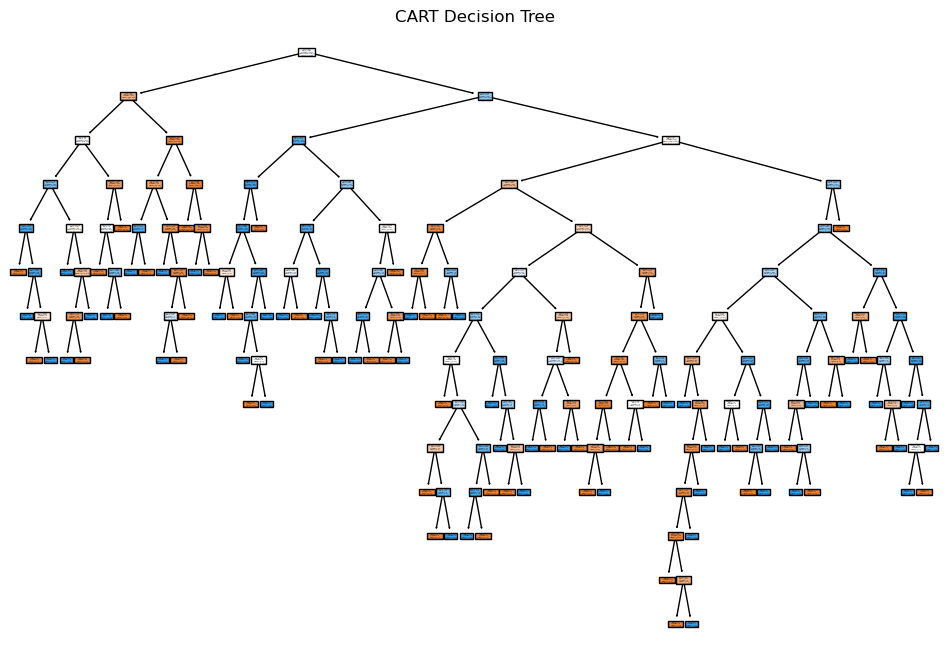

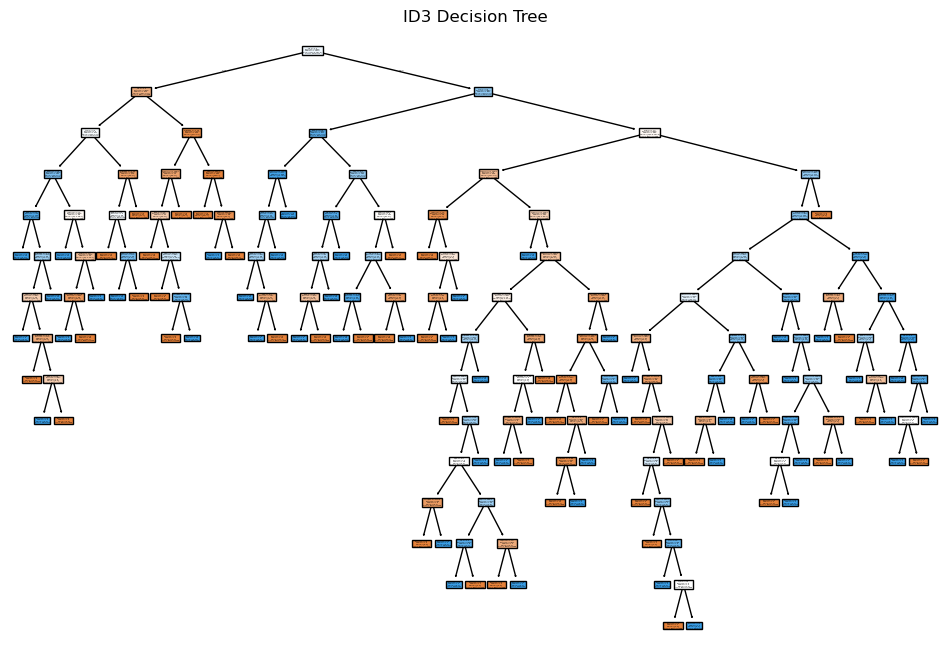

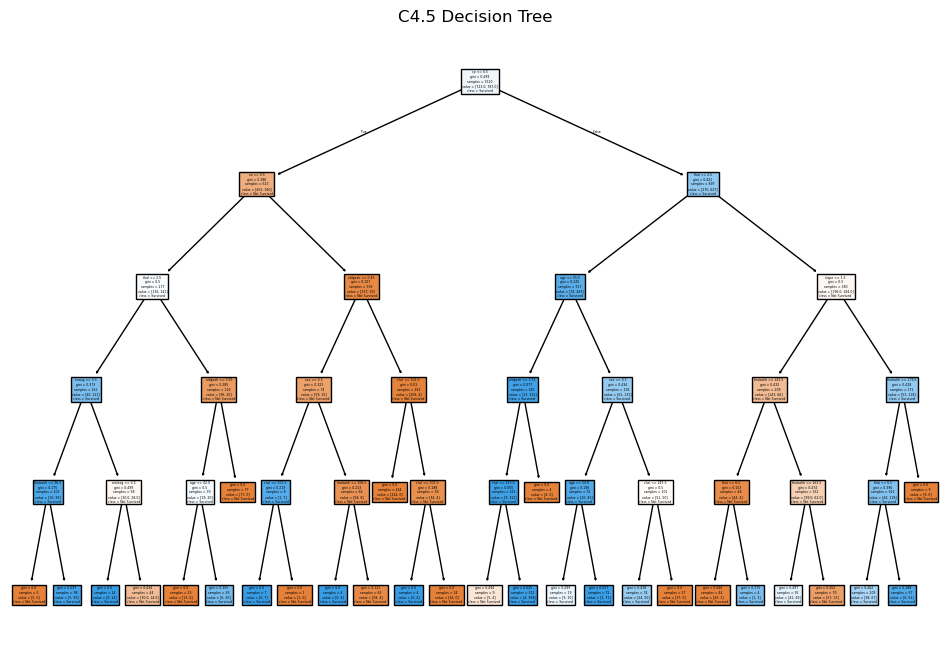

In [17]:
plt.figure(figsize=(12, 8))
plot_tree(cart_model, filled=True, feature_names=X_train.columns, class_names=['Not Survived', 'Survived'])
plt.title("CART Decision Tree")
plt.show()

plt.figure(figsize=(12, 8))
plot_tree(id3_model, filled=True, feature_names=X_train.columns, class_names=['Not Survived', 'Survived'])
plt.title("ID3 Decision Tree")
plt.show()

plt.figure(figsize=(12, 8))
plot_tree(c45_model, filled=True, feature_names=X_train.columns, class_names=['Not Survived', 'Survived'])
plt.title("C4.5 Decision Tree")
plt.show()